In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
heart = pd.read_csv('https://raw.githubusercontent.com/EllaMahaliaaa/Heart-Attack-Classification/main/Heart%20Attack.csv')

In [3]:
heart.drop(columns=['gender'], inplace=True)

In [4]:
heart

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,66,160,83,160.0,1.80,0.012,negative
1,21,94,98,46,296.0,6.75,1.060,positive
2,55,64,160,77,270.0,1.99,0.003,negative
3,64,70,120,55,270.0,13.87,0.122,positive
4,55,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...
1314,44,94,122,67,204.0,1.63,0.006,negative
1315,66,84,125,55,149.0,1.33,0.172,positive
1316,45,85,168,104,96.0,1.24,4.250,positive
1317,54,58,117,68,443.0,5.80,0.359,positive


In [5]:
heart.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,66,160,83,160.0,1.80,0.012,negative
1,21,94,98,46,296.0,6.75,1.060,positive
2,55,64,160,77,270.0,1.99,0.003,negative
3,64,70,120,55,270.0,13.87,0.122,positive
4,55,64,112,65,300.0,1.08,0.003,negative


In [6]:
heart.shape

(1319, 8)

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   impluse        1319 non-null   int64  
 2   pressurehight  1319 non-null   int64  
 3   pressurelow    1319 non-null   int64  
 4   glucose        1319 non-null   float64
 5   kcm            1319 non-null   float64
 6   troponin       1319 non-null   float64
 7   class          1319 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 82.6+ KB


In [8]:
heart['gender'] = pd.read_csv('https://raw.githubusercontent.com/EllaMahaliaaa/Heart-Attack-Classification/main/Heart%20Attack.csv')['gender']

In [9]:
heart['gender'].value_counts()

1    870
0    449
Name: gender, dtype: int64

[Text(0.5, 1.0, 'Female vs. Male Risk of Heart Attack')]

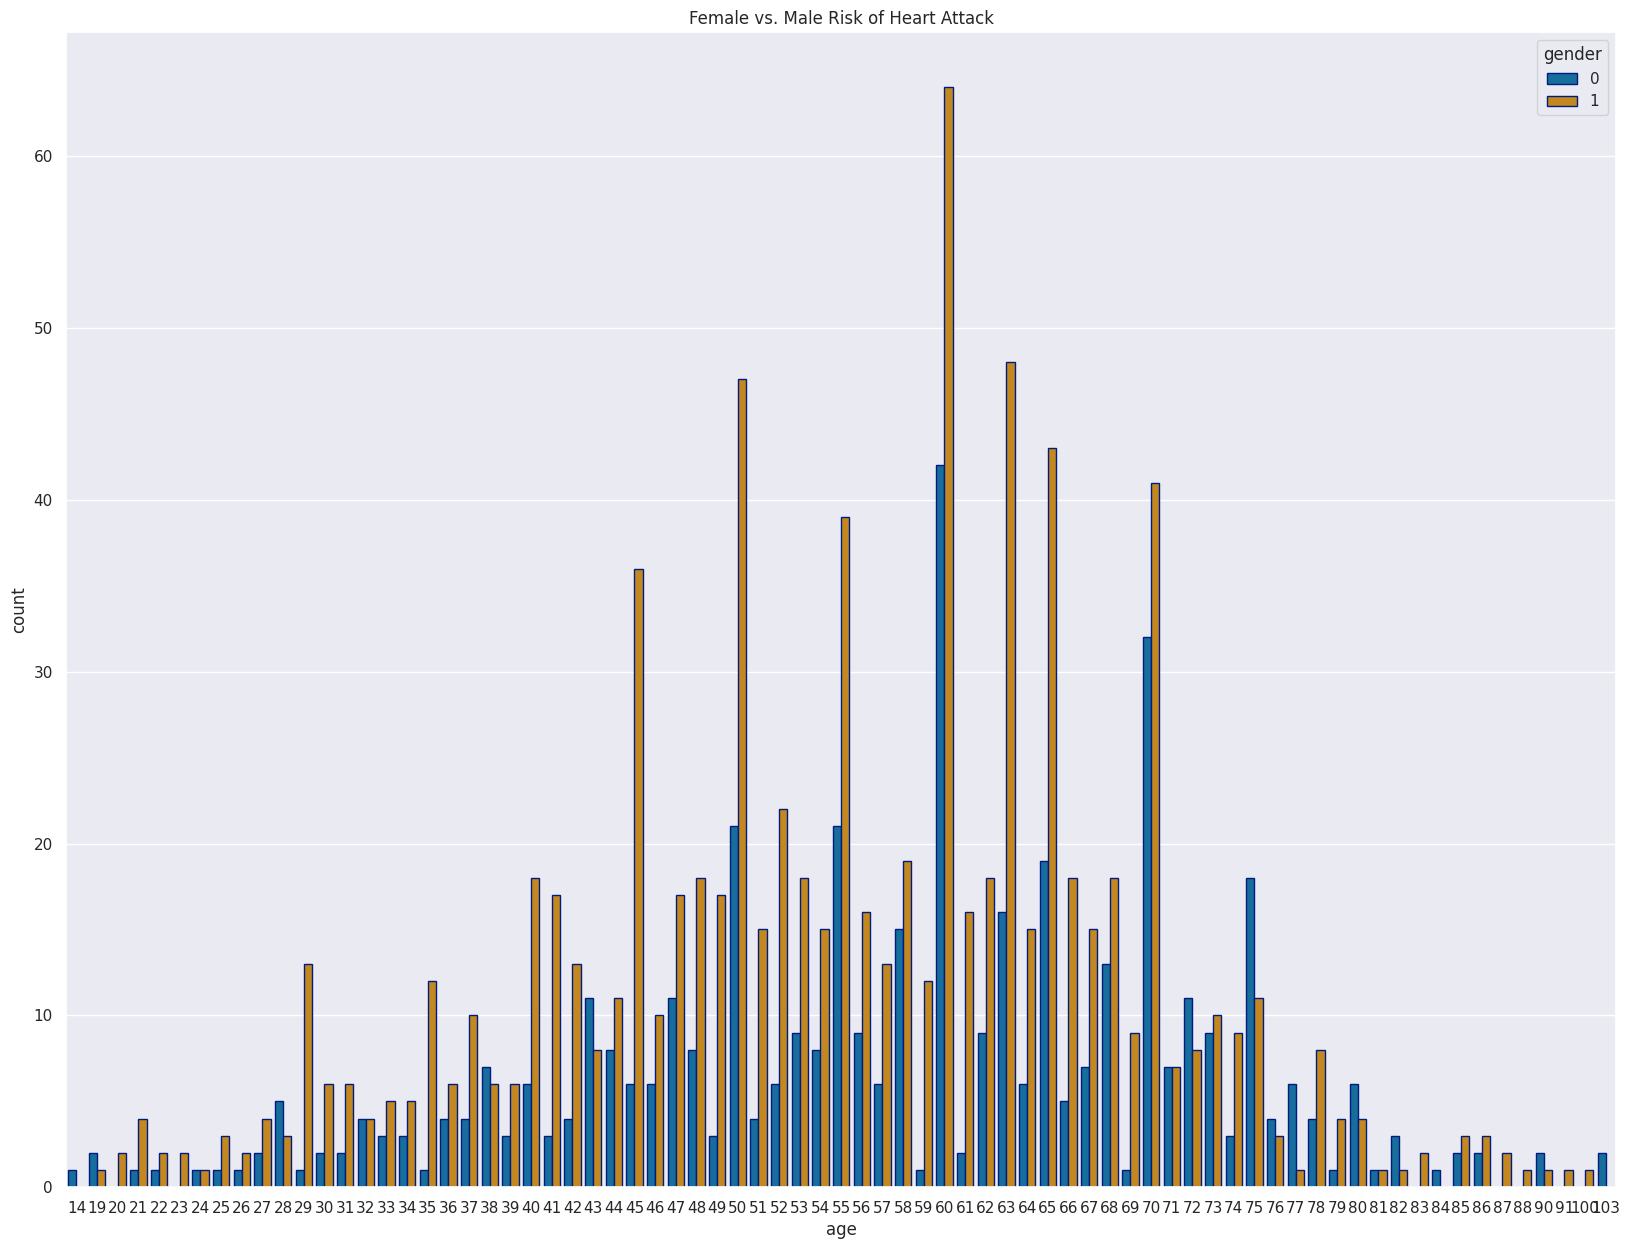

In [10]:
heart['Age'] = (heart['age'])
heart['Age'] = pd.to_numeric(heart['age'], downcast='integer')

sns.set(rc = {'figure.figsize':(20,15)})

sns.countplot(x=heart['age'], hue=heart['gender'], palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1)).set(title='Female vs. Male Risk of Heart Attack')

<ipython-input-11-cac2047d846d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr(), annot=True, fmt ='.0%')


<Axes: >

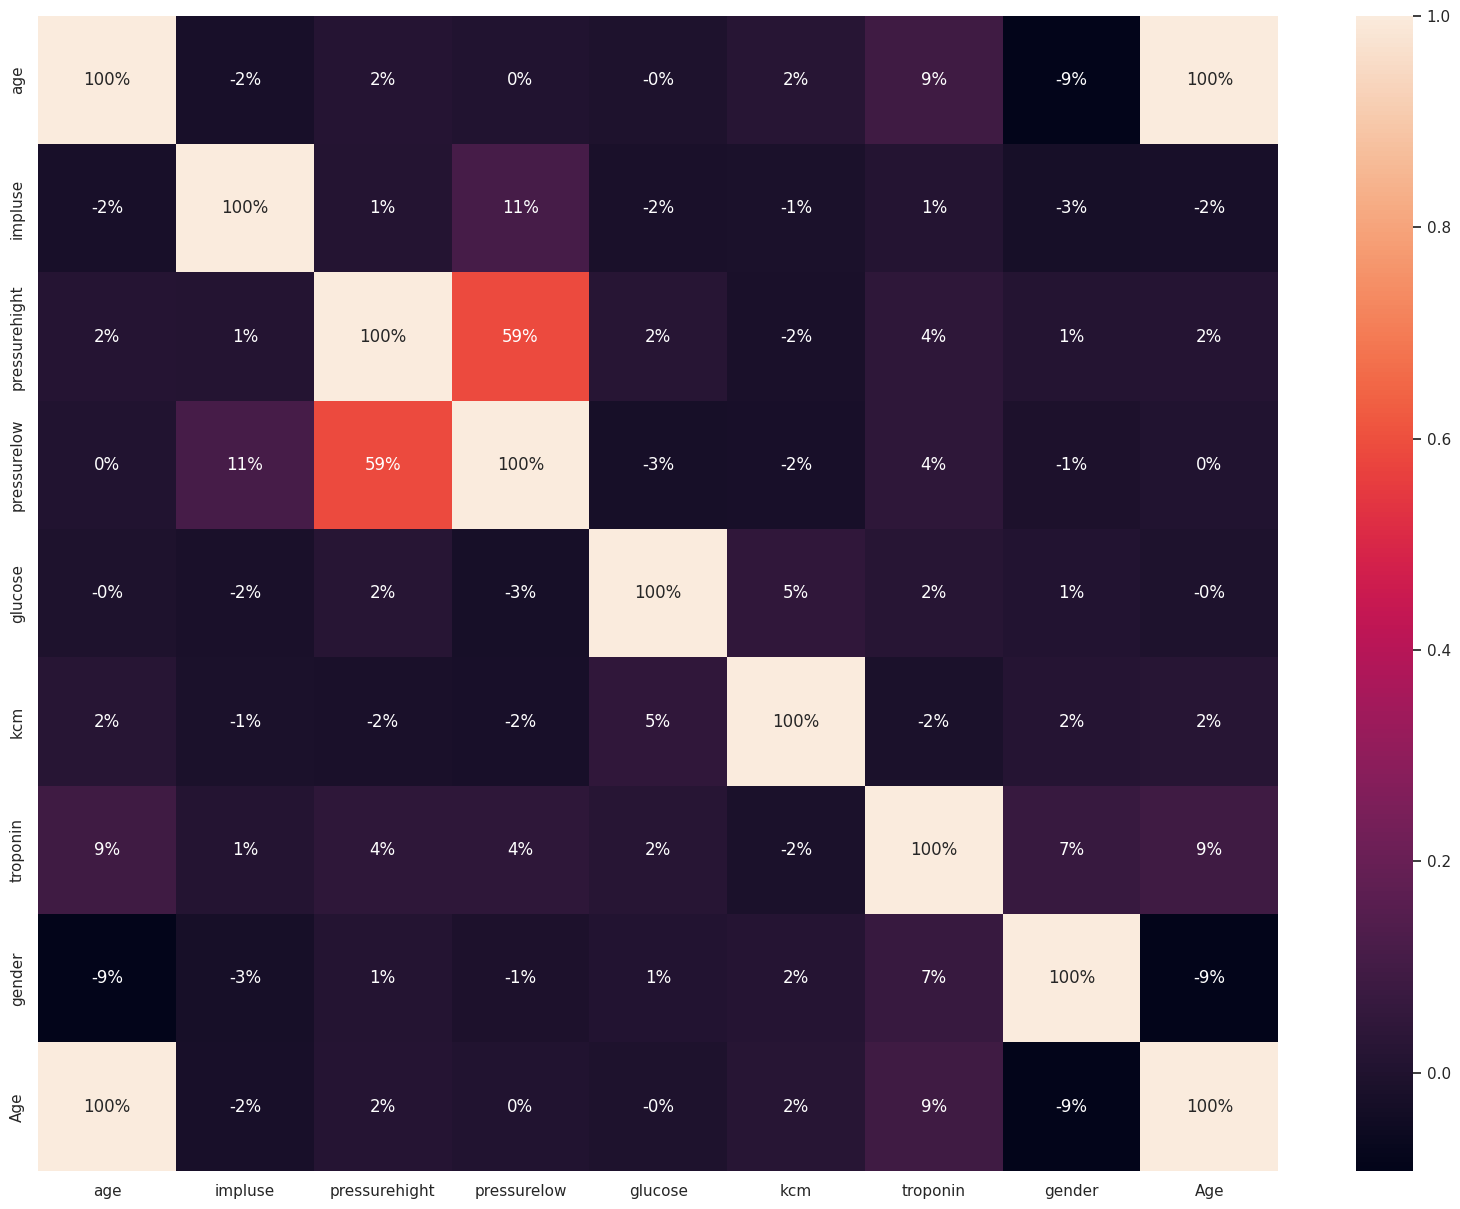

In [11]:
sns.heatmap(heart.corr(), annot=True, fmt ='.0%')

In [12]:
X = heart[['age','impluse','gender','pressurehight','pressurelow','glucose','kcm','troponin']].values

In [13]:
y = heart[['class']].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm



heart_classifier = KNeighborsClassifier(n_neighbors=5)
heart_classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
linear = svm.SVC(kernel='linear',probability=True, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf',probability=True, gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly',probability=True, degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid',probability=True, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

In [ ]:
#5 Fold
k = 5
kf = KFold(n_splits=k)


result = cross_val_score(heart_classifier, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
#GNB
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
#LINEAR
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
#RBF
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
#POLY
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
#SIG
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

In [ ]:
result = cross_val_score(heart_classifier, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

In [ ]:
# Predicting the Test set results
y_pred = heart_classifier.predict(X_test)
y_pred_heart = heart_classifier.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y= heart_classifier.predict_proba(X_test)

In [ ]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['negative(%)', 'positive(%)']])

In [ ]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [ ]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [ ]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [ ]:
comparison_of_true_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
  heart = KNeighborsClassifier(n_neighbors=i)
  heart.fit(X_train, y_train.ravel())
  y_pred = heart.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [ ]:
#KNN Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_heart))

In [ ]:
#GNB Classification Report
print(classification_report(y_test, y_pred_gnb))

In [ ]:
#Linear SVM Classification Report
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

In [ ]:
#Poly SVM Classification Report
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

In [ ]:
#Sig SVM Classification Report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

In [ ]:
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

In [ ]:
#Trained model and the scaler to files
with open('linear_heart_model.pkl', 'wb') as f:
  pickle.dump(linear,f)
with open('scaler.pkl','wb') as f:
  pickle.dump(sc,f)